<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [400]:
import matplotlib.pyplot as plt

%matplotlib inline


In [401]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [402]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [403]:
# Concatenate X and Y and store it as boston
boston = pd.concat([y, X], axis=1)

In [404]:
print(type(boston))
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [405]:
boston.head(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [406]:
boston.columns

Index(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [407]:
boston.isnull().sum() # There is no null value.

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [408]:
boston.dtypes # Data are all float.

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [409]:
boston.shape # Dataset consists of 506 rows and 13 columns

(506, 14)

In [410]:
boston.describe() 
# Summary statiscis shows 
#1. Zn has zero values. 
# 2. Chas and Rad are categorigal data.

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [411]:
boston.nunique() # Number of uniqu values of each column

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

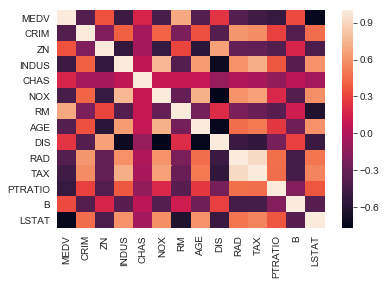

In [412]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.heatmap(boston.corr())

In [413]:
# Create X and y.
feature_cols = ['CRIM','RM','DIS','PTRATIO'] 
X = boston[feature_cols]
y = boston.MEDV

# Instantiate
lr = LinearRegression()
# Fit
lr.fit(X, y)

# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

-3.433300786553243
[-0.20373582  7.37600185  0.01522505 -1.06802348]


In [414]:
# When other variables are zero, y is -3.4
# Y= Median value of owner-occupied homes in $1000's
# 1 CRIM increase is assoicated with 0.203 median value decrese
# 1 RM increase is assoicated with 7.376 median value increase
# 1 DIS increase is assoicated with 0.015 median value increase
# 1 PTRATIO increase is assoicated with 1.068 median value decrese

In [415]:
list(zip(feature_cols, lr.coef_)) # Pare the feature names and the coef

[('CRIM', -0.20373581519128153),
 ('RM', 7.376001848035337),
 ('DIS', 0.015225050189278555),
 ('PTRATIO', -1.068023484066365)]

C:\Users\sarin_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


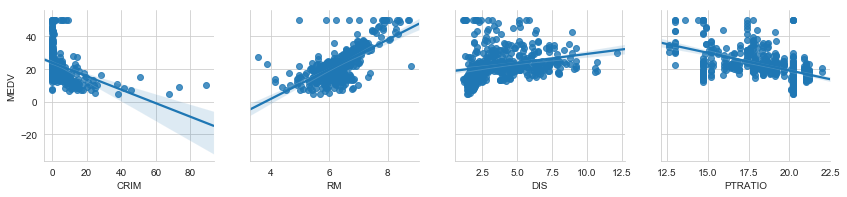

In [416]:
g=sns.pairplot(boston, x_vars=feature_cols, y_vars= 'MEDV', kind='reg');
g.fig.set_size_inches(12,3)

In [417]:
# Predict the response values for the observations in X ("test the model").
lr.predict(X)

array([28.7841349 , 24.98724938, 30.62251887, 28.29762336, 29.38917461,
       24.10856773, 24.74393642, 25.91857231, 21.91657179, 24.68397917,
       27.42031672, 24.72600633, 23.83390102, 17.9614083 , 19.04027066,
       17.11047043, 17.76854514, 18.22551423, 14.27593326, 16.29049908,
       15.0253251 , 18.02355348, 19.25105962, 16.87587582, 17.74777029,
       15.3330138 , 16.94929634, 18.61396788, 21.95567533, 23.2259464 ,
       16.11136575, 18.71284887, 17.80338172, 16.01180628, 18.83096726,
       19.86055429, 19.17545179, 19.25383013, 20.08878673, 25.74320444,
       28.90629497, 27.44574826, 23.00990662, 23.31605998, 22.27613871,
       19.4022508 , 20.16590371, 21.96628088, 17.30976146, 18.81735172,
       22.69268037, 23.82307411, 26.74188662, 22.95876983, 17.56997457,
       31.04745144, 25.30660764, 30.8382012 , 20.93968166, 19.32869774,
       17.95184843, 19.60069213, 23.23364716, 25.4988981 , 29.23702377,
       25.85993127, 22.14818264, 19.82433234, 17.71372773, 19.86

In [418]:
#Store the predicted response values.
y_pred = lr.predict(X)

In [419]:
# Mean squared error
from sklearn import metrics

print(metrics.mean_squared_error(y, y_pred))
# training mean squared error is 34.2
# There are probeles testing with the same dafa of training data

34.2446749903028


### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [420]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 1)
#before splitting
print(X.shape, y.shape)

#after splitting
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(506, 4) (506,)
(354, 4) (354,)
(152, 4) (152,)


In [421]:
def train_test_rmse_70_30(df, feature_cols):
    X = boston[feature_cols]
    y = boston.MEDV
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Prediction')
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [422]:
#First five predicted values
y_pred[0:5]

array([28.7841349 , 24.98724938, 30.62251887, 28.29762336, 29.38917461])

5.29843996523953

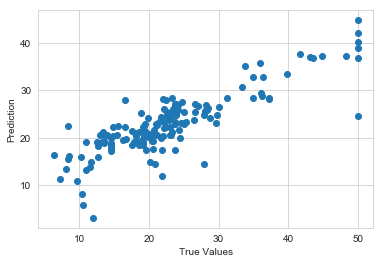

In [423]:
train_test_rmse_70_30(X, ['CRIM','RM','DIS','PTRATIO'])

In [424]:
# 90/10 train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
#before splitting
print(X.shape, y.shape)

#after splitting
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(506, 4) (506,)
(455, 4) (455,)
(51, 4) (51,)


In [425]:
def train_test_rmse_90_10(df, feature_cols):
    X = boston[feature_cols]
    y = boston.MEDV
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Prediction')
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [426]:
#First five predicted values
y_pred[0:5]

array([28.7841349 , 24.98724938, 30.62251887, 28.29762336, 29.38917461])

5.417791611696448

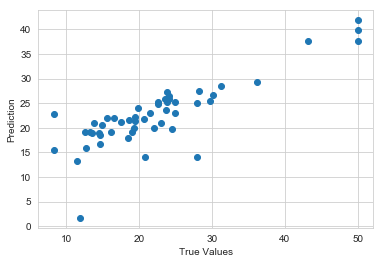

In [427]:
train_test_rmse_90_10(X, ['CRIM','RM','DIS','PTRATIO'])

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [428]:
from sklearn import model_selection

In [429]:
kf = model_selection.KFold(n_splits=10, shuffle=True)

In [430]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 20.177281019896903
R2: 0.5941363505670714

Model 2
MSE: 40.933132689515574
R2: 0.5937149078700018

Model 3
MSE: 80.73770706247589
R2: 0.592986820619078

Model 4
MSE: 33.2227194981289
R2: 0.5939081598370295

Model 5
MSE: 17.976821374979842
R2: 0.5937797518829515

Model 6
MSE: 46.99265899525219
R2: 0.5934324492703512

Model 7
MSE: 38.93042897154565
R2: 0.5931151710245994

Model 8
MSE: 20.283611910701623
R2: 0.5941338363285767

Model 9
MSE: 30.519540561279317
R2: 0.5940837069619105

Model 10
MSE: 21.735940122394187
R2: 0.5941893797578297

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 35.15098422061701
Mean of R2 for all folds: 0.59374805341194


# KNN Practice

In [455]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [456]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [457]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [458]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES


In [459]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [460]:
iris.shape

(150, 5)

In [461]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [462]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


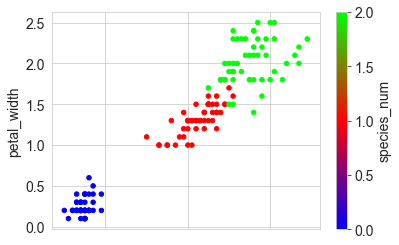

In [463]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

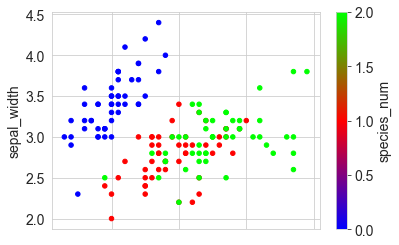

In [464]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [465]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

### Create your target vector "y"
This will be the species type.

In [466]:
y = iris.species_num

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [471]:
#train_test_70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)
#before splitting
print(X.shape, y.shape)
#after splitting
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(150, 4) (150,)
(105, 4) (105,)
(45, 4) (45,)


### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [472]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [473]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9111111111111111


### Create a Model With Five Neighbors. Did it Improve?

In [476]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))
# Slightly improved

0.9777777777777777


### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [477]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

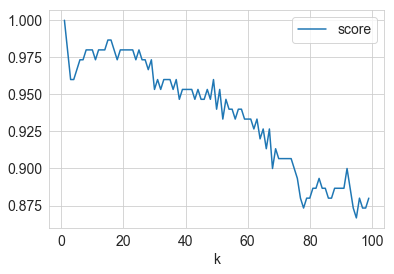

In [478]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [482]:
#Predict proabilties of class membership
#Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [484]:
# First, format our data in a DataFrame

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [485]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1221.
Date:                Sat, 16 Feb 2019   Prob (F-statistic):          1.38e-321
Time:                        20:27:22   Log-Likelihood:                -1567.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

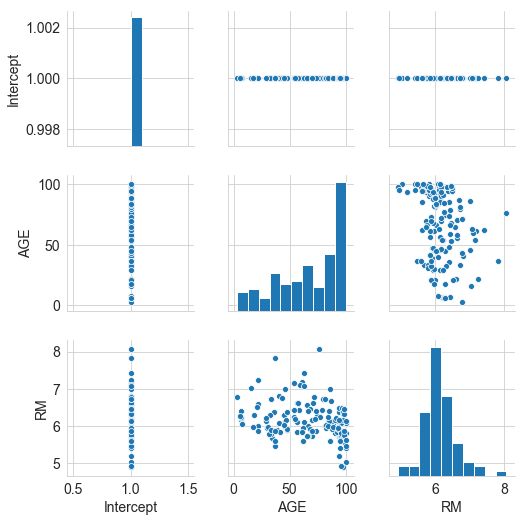

In [489]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [490]:
# Check out Pearson scores
corr = X.corr()
corr

,Intercept,AGE,RM
Intercept,NaN,NaN,NaN
AGE,NaN,1.00000,-0.27857
RM,NaN,-0.27857,1.00000


## Demo: Patsy

In [486]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [487]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


C:\Users\sarin_000\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [488]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.049762585841394924
